# <span style="color:navy"> Numerical Simulation Laboratory

# <span style="color:orange"> Numerical Exercises 02

### <span style="color:black"> Exercise 02.1 </span>
The goal of this exercise was to use MonteCalrlo integration to compute the integral:
$$I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right) dx = 1$$
I used two different methods: sampling a uniform random variable and using importance sampling.

*1) Uniform Sampling*  
In this case a uniform random variable is extracted and used to evaluate the integrand in the integration interval. For the *Central Limit Theorem* after a large number of evaluation the mean value of integrand multiplied for the integration interval should gave a pretty good estimation of $I$.

*2) Importance Sampling*  
In this case the integrand should be evaluated by sampling a random variable from a probability distribution similar to the integrand. Being a density of probility this distribution should also be positive all along the integration interval. For this reason for the integral $I$ it is not possible to use the Taylor expansion of the integrand, as it would be:  
$$\cos\left(\frac{\pi x}{2}\right)\approx 1-\left(\frac{\pi x}{2}\right)^2$$
which is positve in the interval $\left[0, \frac{2}{\pi}\right]$, not in $\left[0, 1\right]$.  
So I decided to approximate the integrand with the straight line across the points $\left(0;\frac{\pi}{2}\right)$ and $\left(1;0\right)$, which is:  
$ f(x) = \frac{\pi}{2} - \frac{\pi}{2}x $  
and normalized as a probability density should be:  
$ p(x) = 2(1-x) $  
In this way the new integrand to evaluate with a variable sampled from $p(x)$ is:
$$ g(x) = \frac {\pi}{4(1-x)}\cos\left(\frac{\pi x}{2}\right)$$

It is important to notice that while calculating how to sample the distribution of $p(x)$ with the inversion of the cumulative, it will be necessary to solve a quadratic equation which has two different solutions. It's important to choose the solution which gives the variable sampled in the right interval, i.e. $\left[0, 1\right]$.

In the following picture the results of $I$ are shown, in function of number of blocks, for the two different methods. I used a total of *M = 1000000* throws, divided in *N = 1000* blocks, in red it's marked the value of $I$, while in blue are the error bars.  
As it can be seen in the last picture the Importance Sampling method is far more precise than the Uniform one, because with the same number of throws gives a very much more accurated result.

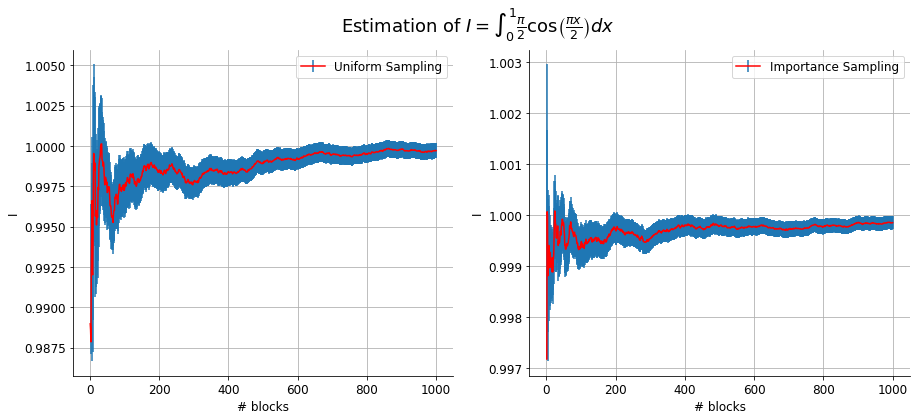

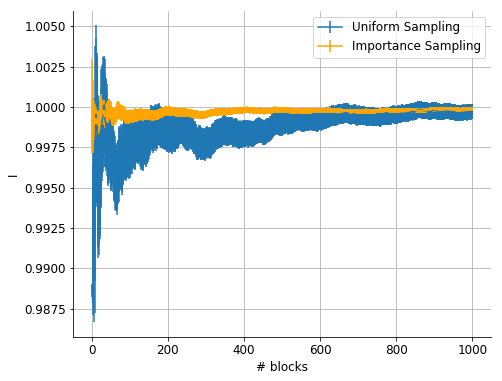

In [1]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, axarr = plt.subplots (1 ,2, figsize=(15,6))
fig.suptitle("Estimation of " + r"$I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right) dx$")
x, f , error = np.loadtxt ("Ex02.1/Integral.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
xIS, fIS , errorIS = np.loadtxt ("Ex02.1/IntegralIS.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
axarr[0].errorbar (x, f, yerr=error, label="Uniform Sampling", c= 'red', ecolor='#1f77b4')
axarr[1].errorbar (xIS, fIS, yerr=errorIS, label="Importance Sampling", c= 'red', ecolor='#1f77b4')
for i in range(2):
    axarr[i].set_xlabel ('# blocks')
    axarr[i].set_ylabel ('I')
    axarr[i].grid(True)
    axarr[i].legend()
plt.figure(figsize=(7.5,6))
plt.errorbar (x, f, yerr=error, label="Uniform Sampling")
plt.errorbar (xIS, fIS, yerr=errorIS, label="Importance Sampling", c= 'orange')
plt.xlabel ('# blocks')
plt.ylabel ('I')
plt.legend()
plt.grid(True)
plt.show()

### <span style="color:black"> Exercise 02.2 </span>
###### <span style="color:black"> Random Walk</span>
This second exercise required to compute a *Random Walk* starting from the origin in two different cases: on a 3D Lattice and in a continuum space.  
The goal was to calculate ${\scriptsize \sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}}$ for both *Random Walks*, i.e the mean distance from the origin as a function of the step ${\scriptsize i\in [0,10^2]}$., by repeating the *Random Walks* a great amount of times (I made *M = 10000 RWs* divided in *N = 100* blocks).

The first problem I met was how I could not use improperly memory when I had to perform *M* different *RWs* each with *100* steps.  
I thought that there were two different possibilities:  
1. Simulate an entire *RW*, *M* times, and each time increase a cumulative variable for each step with the value of ${\scriptsize |\vec{r}_i|^2}$. Furthermore other 2 variable per step are necessary, in order to cumulate the values for *data blocking*. In this case is required to record only the last position or the *RW*, which means 3 scalars.  
2. Simulate *M* times each step of the *RW*, but in this case it is necessary to remember *M* positions, which means 3 scalars multiplied to *M*,but it is possible to evaluate the ${\scriptsize |\vec{r}_i|^2}$ with *data blocking* on the run.

Given the value of *M* far greater than the number of *RW* steps I decided that it was less expensive in memory cost to adopt the first solution as it requires only ${\scriptsize3\cdot 100}$ variables to be recorded (instead of ${\scriptsize3\cdot 10000})$, and so I did.  
I also evaluated that the two solutions have more or less the same running time, because in each of them is required to make ${\scriptsize10000\cdot 100}$ simulation steps, no matter in which order is done.

Now, the only difference between the two simulations is how the *next step* is generated.  
_1) 3D lattice_  
To make the step two different uniform random variable are sampled, the first in the interval ${\scriptsize [0,3]}$ gives the direction on the lattice ($x$ if the variable is less than ${\scriptsize1}$, $y$ if between ${\scriptsize1}$ and ${\scriptsize2}$, and $z$ if greater than ${\scriptsize2}$); the second is in the interval ${\scriptsize [0,2]}$ and sets if the step is backward (if less than ${\scriptsize1}$) or forward (if more than ${\scriptsize1}$).  

_2) Continuum space_  
A uniform random solid angle is sampled by sampling $\phi$ uniformly in ${\scriptsize[0,2\pi]}$ and $\theta$ following the distribution of probability ${\scriptsize p(x) = \frac{1}{2}\sin\theta}$, given from the Jacobian of the coordinates change. The step of lenght $a$ projected on the three principal axis is:  
$x = a\sin\theta\cos\phi$  
$y = a\sin\theta\sin\phi$  
$z = a\cos\theta$

In both cases the step has lenght $a = 1$.

As said before, using the method of simulating an entire *RW* *M* times it is needed to record only the last position of the *Rw* so each time a new step ${\scriptsize i}$ is made the cumulative variable of ${\scriptsize |\vec{r}_i|^2}$ is incremented for each of the *L = M/N* *RWs* in a block. After the ${\scriptsize i}$ step of the last *RW* of the block is completed the block mean of ${\scriptsize |\vec{r}_i|^2}$ is calculated and cumulated in another variable and it squared value (which is necessary for the estimation of the error) is cumulated too.  
This process is repeated for all the *N* blocks and when the  mean value of ${\scriptsize|\vec{r}_i|^2}$ of the last block is cumulated, the mean of the block *N* is calculated with its statistical uncertainty, then it is calculated the value of ${\scriptsize \sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}}$ and the error propagation is made to get the final result.

In the figures below the value of ${\scriptsize \sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}}$ are shown as a function of the step ${\scriptsize i}$ for both the 3Dlattice and the continuum *Random Walk*.  
Since a *Random Walk* in the limit of great *M* becomes a diffusive process it is possible to fit the graphs with a function like ${\scriptsize f(S)=k\sqrt{S}}$ where $S$ is the number of steps (which is the unit of time in discrete simulation).

3D-lattice Random Walk
optimized parameter k =  1.0029471133179548
parameter uncertainty =  0.00012400503231669392


Continuum Random Walk
optimized parameter k =  0.9972190328217314
parameter uncertainty =  0.00030354808952226227


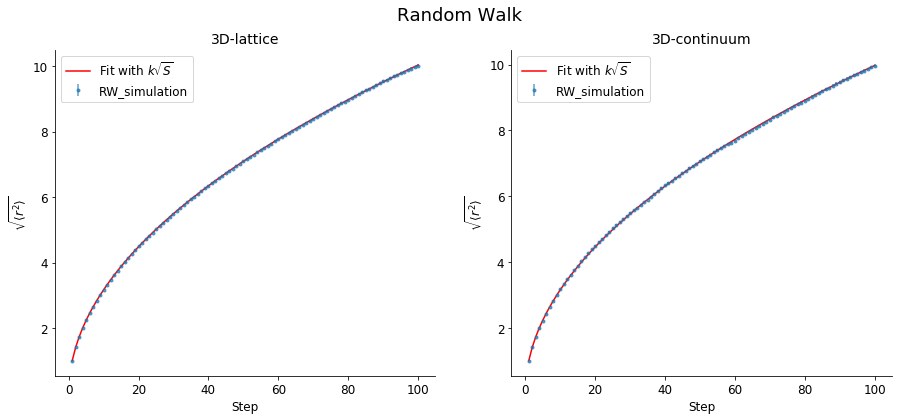

In [2]:
from scipy.optimize import curve_fit
from IPython.display import Latex
def f(x, a): #fittinng function
	return a*x**0.5

fig, axarr = plt.subplots (1 ,2, figsize=(15,6), edgecolor='black')
fig.suptitle("Random Walk")
#graph for 3D_Lattice Random Walk
n, r_n , error = np.loadtxt ("Ex02.2/3D_latticeRW.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
axarr[0].errorbar (n, r_n, yerr=error, fmt= '.', label="RW_simulation", alpha=0.7)

#fit parameters
p_opt, p_cov = curve_fit (f, n, r_n, bounds = (0,10))
y_fit = f(n, p_opt) 

#fit plot
axarr[0].plot (n, y_fit, label = r'Fit with $k\sqrt{S}$', color='red')
axarr[0].set_title ("3D-lattice")

#parameters print
print("3D-lattice Random Walk")
print("optimized parameter k = ", p_opt [0],) 
print ("parameter uncertainty = ", np.sqrt(np.diagonal(p_cov)[0]))
print ('\n')


#graph for 3D_Continuum Random Walk
n, r_n , error = np.loadtxt ("Ex02.2/3D_continuumRW.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
axarr[1].errorbar (n, r_n, yerr=error,fmt='.', label="RW_simulation", alpha=0.7)

#fit parameters
p_opt, p_cov = curve_fit (f, n, r_n, bounds = (0,10))
y_fit = f(n, p_opt) 

#fit plot
axarr[1].plot (n, y_fit, label = r'Fit with $k\sqrt{S}$',color='red')
axarr[1].set_title ("3D-continuum")

#parameters print
print("Continuum Random Walk")
print("optimized parameter k = ", p_opt [0],) 
print ("parameter uncertainty = ", np.sqrt(np.diagonal(p_cov)[0]))


for i in range(2):
    axarr[i].set_xlabel ('Step')
    axarr[i].set_ylabel (r'$\sqrt{\langle r^2\rangle}$')
    axarr[i].legend()

plt.show()